In [ ]:
#  KNN is for classification 
# Reading: chapter 4

### Training algorithm - store all the data <br>
### Prediction algorithm 
#### 1. calculate the distance between x to all the points of your data
#### 2. sort the point in your data by increasing distance from x
#### 3. predict the majority of label of the 'k' closest point

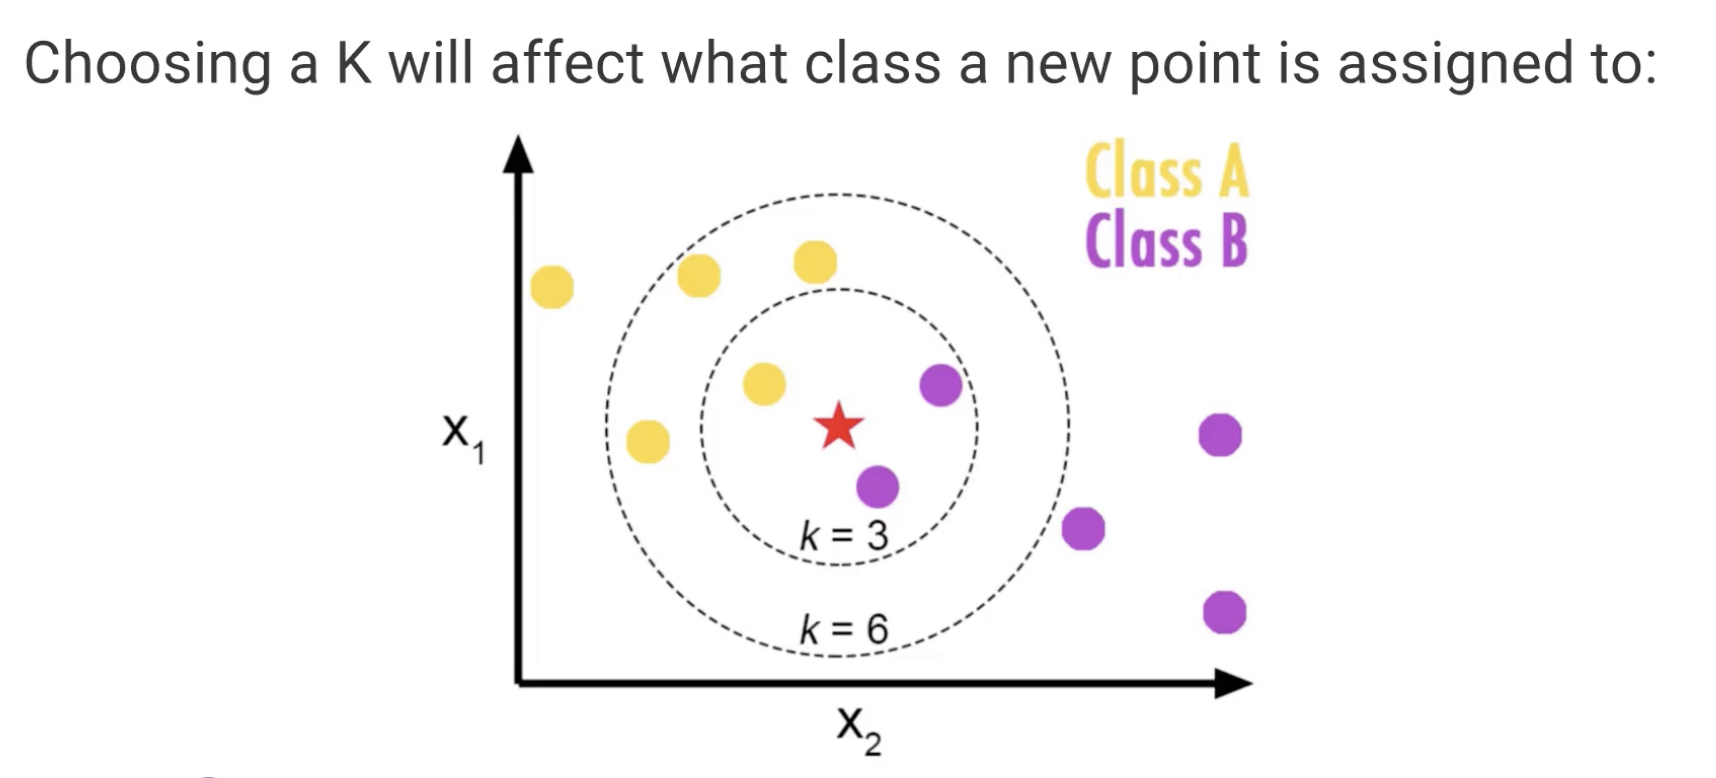

### Pros:
#### 1. simple & training is trivial
#### 2. work with any number of classes
#### 3. easy to add more data
#### 4. few parameters (k, distance metric)

### Cons:
#### 1. high prediction cost (worse for larger dataset)
#### 2. not good with high dimensional data
#### 3. categorical features don't work well

In [30]:
# In big companies when interviewing a data scientist position, they will give you data with unknown column names
#  and you have to explore the data, classify. in this case we use KNN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df = pd.read_csv('Classified Data',index_col=0)

In [32]:
df.head()
# Scale matters, since the scale here is different, we need to standarlize it.

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [36]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))  # Perform standardization by centering and scaling

In [39]:
len(scaled_features)

1000

In [45]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [46]:
from sklearn.model_selection import train_test_split

In [109]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn = KNeighborsClassifier(n_neighbors=1)

In [112]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [113]:
pred = knn.predict(X_test)

In [114]:
from sklearn.metrics import classification_report, confusion_matrix

In [115]:
print(confusion_matrix(y_test, pred),end='\n\n\n\n')
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]



              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [116]:
# Use different k values and plot out the result, to see the best k value
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
#     np.mean(pred_i != y_test)) IS HUGE! LOOK HERE!
    error_rate.append(np.mean(pred_i != y_test))

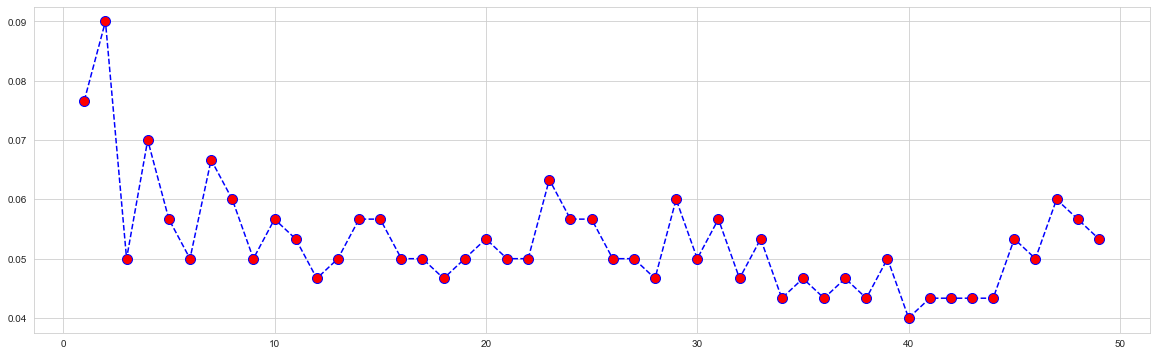

In [117]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
plt.plot(range(1,50),error_rate,color='Blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [118]:
# IT LOOKS LIKE WHEN N_NEIGHBORS = 40, THE RESULT IS THE BEST.

In [119]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [121]:
print(confusion_matrix(y_test, pred))
print('\n\n')
print(classification_report(y_test, pred))

[[154   5]
 [  7 134]]



              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

